# Stocks selection

We evaluated the `129` stocks present on our database in order to select a subgroup for the network analysis.


## Summary

For the network analysis that will be performed for minimal covariance portfolio selection, some characteristics of the data should be present, namely:

1. The time series should not have too many `missing` values
2. The covariance matrix between the stocks should generate an irreducible graph, meaning that all the stocks should communicate with each other (so we can compute the betweeness 



# Exploratory Data Analysis and Cleaning

Before we dive into the meat of our asset allocation model, we first explore, clean, and preprocess our historical price data for time-series analyses. In this section we complete the following.

- Observe how many rows and columns are in our dataset and what they mean
- Observe the datatypes of the columns and update them if needed
- Take note of how the data is structured and what preprocessing will be necessary for time-series analyses
- Deal with any missing data accordingly
- Test which time series satisfies the conditions for our model

In [2]:
#import data manipulation (pandas) and numerical manipulation (numpy) modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#silence warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
#reads the csv file into pandas DataFrame
# df = pd.read_csv("https://github.com/firmai/random-assets/blob/master/all_stocks.csv?raw=true")
# df = get_daily_from_db()
df = pd.read_csv(r"data/20130102_20200529_daily.csv", index_col=0, parse_dates=True)

#prints first 5 rows of the DataFrame
df.head()

,Ticker,Open,Low,High,Close,Volume,Name
Day,,,,,,,
2013-01-02,ABCB4,14.00,14.00,14.27,14.15,5224632.0,ABC BRASIL
2013-01-02,ALPA4,15.10,14.98,15.30,15.16,2719722.0,ALPARGATAS
2013-01-02,AMAR3,32.55,32.54,33.01,32.63,7420976.0,LOJAS MARISA
2013-01-02,BBAS3,26.00,25.46,26.19,25.80,220234920.0,BRASIL
2013-01-02,BBDC3,34.30,34.30,35.43,35.11,39184241.0,BRADESCO


* ```Day```: date (yyyy-mm-dd), index of the data frame
* ```Ticker```: The ticker code for the stocks
* ```Open```: daily opening prices (USD)
* ```Low```: daily low prices (USD)
* ```High```: daily high prices (USD)
* ```Close```: daily closing prices (USD)
* ```Volume```: daily volume (number of shares traded)
* ```Name```: Short name of the company

In [17]:
#prints last 5 rows
df.tail()

,Ticker,Open,Low,High,Close,Volume,Name
Day,,,,,,,
2020-05-29,VIVT4,47.39,46.39,47.53,47.14,2.268595e+08,TELEF BRASIL
2020-05-29,VVAR3,12.45,11.87,12.70,12.40,1.252818e+09,VIAVAREJO
2020-05-29,WEGE3,40.20,39.61,41.83,41.83,3.634596e+08,WEG
2020-05-29,YDUQ3,28.40,27.67,28.95,28.48,8.791632e+07,YDUQS PART
2020-05-29,OIBR3,0.73,0.71,0.75,0.75,1.037060e+08,OI


In [18]:
#prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185853 entries, 2013-01-02 to 2020-05-29
Data columns (total 7 columns):
Ticker    185853 non-null object
Open      185853 non-null float64
Low       185853 non-null float64
High      185853 non-null float64
Close     185853 non-null float64
Volume    185853 non-null float64
Name      185853 non-null object
dtypes: float64(5), object(2)
memory usage: 11.3+ MB


In [19]:
#prints unique tickers in the Name column
print("There are {} unique stocks\n\n".format(len(df['Ticker'].unique())))
print(df['Ticker'].unique())

There are 124 unique stocks


['ABCB4' 'ALPA4' 'AMAR3' 'BBAS3' 'BBDC3' 'BBDC4' 'BEEF3' 'BRAP4' 'BRFS3'
 'BRML3' 'BRPR3' 'BTOW3' 'CCRO3' 'CIEL3' 'CMIG3' 'CMIG4' 'CPFE3' 'CSAN3'
 'CSMG3' 'CSNA3' 'CYRE3' 'DIRR3' 'DTEX3' 'ECOR3' 'ELET3' 'EMBR3' 'ENBR3'
 'EQTL3' 'EVEN3' 'EZTC3' 'FLRY3' 'GFSA3' 'GGBR4' 'GOAU4' 'GOLL4' 'GRND3'
 'GUAR3' 'HBOR3' 'HGTX3' 'HYPE3' 'IGTA3' 'ITSA4' 'ITUB3' 'ITUB4' 'JBSS3'
 'JHSF3' 'JSLG3' 'KLBN4' 'LAME3' 'LAME4' 'LCAM3' 'LIGT3' 'LOGN3' 'LREN3'
 'MDIA3' 'MGLU3' 'MILS3' 'MRFG3' 'MRVE3' 'MULT3' 'MYPK3' 'OIBR3' 'PETR3'
 'PETR4' 'POMO4' 'POSI3' 'PSSA3' 'QUAL3' 'RADL3' 'RAPT4' 'RENT3' 'SBSP3'
 'SLCE3' 'SMTO3' 'TCSA3' 'TIMP3' 'TOTS3' 'TRIS3' 'TRPL4' 'TUPY3' 'UGPA3'
 'VALE3' 'VIVT4' 'WEGE3' 'VVAR3' 'LINX3' 'BBSE3' 'ENEV3' 'ANIM3' 'SEER3'
 'ABEV3' 'CVCB3' 'BPAN4' 'RLOG3' 'MEAL3' 'PRIO3' 'PCAR3' 'EGIE3' 'STBP3'
 'MOVI3' 'RAIL3' 'AZUL4' 'TEND3' 'CRFB3' 'IRBR3' 'CAML3' 'SMLS3' 'SUZB3'
 'BRDT3' 'BKBR3' 'B3SA3' 'GNDI3' 'HAPV3' 'BIDI4' 'SQIA3' 'CNTO3' 'ENAT3'
 'NEOE3' 'YDUQ3' 'ALS

# Preprocessing for Time-Series Analysis

In this section we do the following.

1. Remove stocks from the same company (e.g.: ITUB4 - preferred type - and ITUB3 - ordinary type);
<br/><br/>
2. We create a seperate DataFrame for the ``Open``, ``High``, ``Low``, and ``Close`` time-series;
    * Pivot the tickers in the ``Ticker`` column of ``df`` to the column names of the above DataFrames and set the values as the daily prices 
<br/><br/>
3. Transform each time-series so that it's stationary;
    * We do this by transforming the prices in returns with the pd.pct_change() method
<br/><br/>
4. Remove the missing data;
5. Examine the assumptions of our minimal risk portfolio selection model.

In [20]:
# Range of our data
print("The data contains stock prices from {} to {}.".format(df.index.min(), df.index.max()))

The data contains stock prices from 2013-01-02 00:00:00 to 2020-05-29 00:00:00.


## 1. Removing tickers from the same company

In [21]:
# determine which comnpanies have more than one Ticker
companies = df.Name.unique()
companies_df = pd.DataFrame({'Name': companies, 'n': [len(df.loc[df.Name == b].Ticker.unique()) for b in companies]})
companies_df.loc[companies_df.n > 1].Name

4         BRADESCO
13           CEMIG
40    ITAUUNIBANCO
45    LOJAS AMERIC
58       PETROBRAS
Name: Name, dtype: object

In [22]:
# Getting the Tickers
comp_tickers = set(companies_df.loc[companies_df.n > 1].Name)
df.loc[df.Name.apply(lambda x: x in comp_tickers), "Ticker"].unique()

array(['BBDC3', 'BBDC4', 'CMIG3', 'CMIG4', 'ITUB3', 'ITUB4', 'LAME3',
       'LAME4', 'PETR3', 'PETR4'], dtype=object)

We see that `BRADESCO` has the tickers `BBDC3` and `BBDC4`, and the same for all the 5 companies. We will select the stocks `4` (preferred)

In [23]:
print("Before: {}".format(df.shape))
ordinary_to_remove = set(['BBDC3', 'CMIG3', 'ITUB3', 'LAME3', 'PETR3'])
df = df.loc[df.Ticker.apply(lambda x: x not in ordinary_to_remove)]
print("After: {}".format(df.shape))

Before: (185853, 7)
After: (176693, 7)


## 2. Remove stocks not traded in the last month of the training set

In [24]:
TRAIN_RANGE = ('2013-01-02', '2016-12-29')
TEST_RANGE = ('2017-01-02', '2020-05-29')

df_train = df.loc[TRAIN_RANGE[0]:TRAIN_RANGE[1]]
df_validate = df.loc[TEST_RANGE[0]:TEST_RANGE[1]]

In [25]:
#creates a DataFrame for each time-series (see In [11])
df_close = df_train.pivot(columns='Ticker', values='Close')
df_open = df_train.pivot(columns='Ticker', values='Open')
df_high = df_train.pivot(columns='Ticker', values='High')
df_low = df_train.pivot(columns='Ticker', values='Low')

df_list = [df_close, df_open, df_high, df_low]

df_close.head()

Ticker,ABCB4,ABEV3,ALPA4,AMAR3,ANIM3,BBAS3,BBDC4,BBSE3,BEEF3,BPAN4,...,TIMP3,TOTS3,TRIS3,TRPL4,TUPY3,UGPA3,VALE3,VIVT4,VVAR3,WEGE3
Day,,,,,,,,,,,,,,,,,,,,,
2013-01-02,14.15,NaN,15.16,32.63,NaN,25.80,36.02,NaN,11.26,NaN,...,8.05,40.98,3.00,33.50,48.00,45.80,44.10,49.62,NaN,28.14
2013-01-03,14.19,NaN,15.15,32.05,NaN,26.31,38.12,NaN,11.22,NaN,...,7.98,40.90,3.05,33.70,48.45,45.28,43.35,50.12,18.0,29.40
2013-01-04,13.99,NaN,15.19,32.05,NaN,26.00,37.45,NaN,11.20,NaN,...,7.98,39.65,3.00,35.66,48.50,46.70,42.53,50.19,18.0,29.05
2013-01-07,14.10,NaN,14.85,32.09,NaN,26.15,37.29,NaN,11.20,NaN,...,7.90,39.89,3.20,35.19,NaN,47.00,41.84,50.20,NaN,28.70
2013-01-08,14.25,NaN,14.65,31.70,NaN,26.45,37.42,NaN,11.19,NaN,...,7.90,40.15,3.25,33.65,48.47,47.20,41.51,50.40,18.0,27.55


## 4. Remove missing data

In [26]:
#counts the missing values in each column
missing_values = pd.concat([a.isnull().sum() for a in df_list], axis=1)
missing_values['avg'] = missing_values.mean(axis=1)
missing_values

,0,1,2,3,avg
Ticker,,,,,
ABCB4,0,0,0,0,0.0
ABEV3,216,216,216,216,216.0
ALPA4,0,0,0,0,0.0
AMAR3,1,1,1,1,1.0
ANIM3,206,206,206,206,206.0
...,...,...,...,...,...
UGPA3,0,0,0,0,0.0
VALE3,0,0,0,0,0.0
VIVT4,0,0,0,0,0.0


In [27]:
missing_values.avg.describe()

count     94.000000
mean      70.021277
std      197.758513
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      984.000000
Name: avg, dtype: float64

> **Many tickers have too many missing values. We will filter them out.**

In [28]:
miss_avg = missing_values['avg']

# Remove Tickers with more than 3 errors (from 11 and more)
to_remove = miss_avg.loc[miss_avg > 3].index
print("{} will be removed, and {} will remain in the dataset".format(len(to_remove), len(miss_avg)-len(to_remove)))
to_remove

18 will be removed, and 76 will remain in the dataset


Index(['ABEV3', 'ANIM3', 'BBSE3', 'BPAN4', 'CVCB3', 'EGIE3', 'ENEV3', 'LCAM3',
       'LINX3', 'MEAL3', 'PCAR3', 'PRIO3', 'RLOG3', 'SEER3', 'STBP3', 'TRIS3',
       'TUPY3', 'VVAR3'],
      dtype='object', name='Ticker')

In [29]:
# Remove from the data
print("Close price before: {}".format(df_close.shape))
for df in df_list:
  df.drop(to_remove, axis=1, inplace=True)

print("Close price after: {}".format(df_close.shape))

Close price before: (991, 94)
Close price after: (991, 76)


In [30]:
df_close.isnull().sum().describe()

count    76.000000
mean      0.039474
std       0.196013
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
dtype: float64

Since the number of remaining missing values in every column is considerably small, we can safely drop them.

In [31]:
#drops all missing values in each DataFrame
for df in df_list:
    df.dropna(inplace=True)

# Fill NA values
#for df in df_list:
#    df.fillna(inplace=True, method="ffill")


# Update list of stocks
stocks = df_close.columns.tolist()
np.array(stocks) # Just because it prints better

array(['ABCB4', 'ALPA4', 'AMAR3', 'BBAS3', 'BBDC4', 'BEEF3', 'BRAP4',
       'BRFS3', 'BRML3', 'BRPR3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4',
       'CPFE3', 'CSAN3', 'CSMG3', 'CSNA3', 'CYRE3', 'DIRR3', 'DTEX3',
       'ECOR3', 'ELET3', 'EMBR3', 'ENBR3', 'EQTL3', 'EVEN3', 'EZTC3',
       'FLRY3', 'GFSA3', 'GGBR4', 'GOAU4', 'GOLL4', 'GRND3', 'GUAR3',
       'HBOR3', 'HGTX3', 'HYPE3', 'IGTA3', 'ITSA4', 'ITUB4', 'JBSS3',
       'JHSF3', 'JSLG3', 'KLBN4', 'LAME4', 'LIGT3', 'LOGN3', 'LREN3',
       'MDIA3', 'MGLU3', 'MILS3', 'MRFG3', 'MRVE3', 'MULT3', 'MYPK3',
       'OIBR3', 'PETR4', 'POMO4', 'POSI3', 'PSSA3', 'QUAL3', 'RADL3',
       'RAPT4', 'RENT3', 'SBSP3', 'SLCE3', 'SMTO3', 'TCSA3', 'TIMP3',
       'TOTS3', 'TRPL4', 'UGPA3', 'VALE3', 'VIVT4', 'WEGE3'], dtype='<U5')

## 3. Detrending and Additional Data Cleaning

We will use the log-returns of the data. This is assumed to create stationary series.

In [32]:
# Get the logreturns
df_close = df_close.apply(np.log).diff().dropna()
df_open = df_open.apply(np.log).diff().dropna()
df_high = df_high.apply(np.log).diff().dropna()
df_low = df_low.apply(np.log).diff().dropna()

#list of training DataFrames containing each time-series
df_list = [df_close, df_open, df_high, df_low]

In [33]:
df_close.head()

Ticker,ABCB4,ALPA4,AMAR3,BBAS3,BBDC4,BEEF3,BRAP4,BRFS3,BRML3,BRPR3,...,SLCE3,SMTO3,TCSA3,TIMP3,TOTS3,TRPL4,UGPA3,VALE3,VIVT4,WEGE3
Day,,,,,,,,,,,,,,,,,,,,,
2013-01-03,0.002823,-0.000660,-0.017935,0.019575,0.056665,-0.003559,-0.010573,0.013439,0.002160,-0.009737,...,-0.015504,-0.029632,0.007273,-0.008734,-0.001954,0.005952,-0.011419,-0.017153,0.010026,0.043803
2013-01-04,-0.014195,0.002637,0.000000,-0.011853,-0.017732,-0.001784,-0.019980,0.014849,-0.005770,0.009350,...,-0.012051,0.003378,-0.013374,0.000000,-0.031039,0.056532,0.030879,-0.019097,0.001396,-0.011976
2013-01-07,0.007832,-0.022637,0.001247,0.005753,-0.004282,0.000000,-0.036814,0.000000,-0.008718,-0.003496,...,-0.009002,-0.018530,-0.008605,-0.010076,0.006035,-0.013268,0.006403,-0.016357,0.000199,-0.012121
2013-01-08,0.010582,-0.013560,-0.012228,0.011407,0.003480,-0.000893,0.000000,-0.005913,-0.009531,0.001944,...,0.055857,0.059277,-0.012423,0.000000,0.006497,-0.044749,0.004246,-0.007918,0.003976,-0.040895
2013-01-09,-0.010582,-0.008225,0.018751,0.009407,0.012746,0.000893,-0.001564,0.031656,0.010989,0.023034,...,0.005018,0.021353,0.000000,-0.011458,0.002984,0.010347,-0.002121,0.004567,-0.007968,0.007594


# Examining the conditions for our model

Now we already have a selected group of 80 stocks. We will examine if they can be used on our betweeness centrality model.

1. We compute the *distance correlation matrix* $\rho_{D}(X_{i}, X_{j})$ for the ``Open``, ``High``, ``Low``, and ``Close`` time series.
2. We create a master matrix with the average between the prices.
3. We use the `NetworkX` module to transform each distance correlation matrix into a weighted graph.
4. We adopt the winner-take-all method and remove edges with correlations below a threshold value that will be determined in order to maintain a connected graph. If the value is to small, we will discard additional stocks.

<br/><br/>
<center>$$Cor_{ij} = \begin{cases} 
      \rho_{D}(X_{i}, Y_{j}), & \rho \geq \rho_{c}  \\
      0, & \text{otherwise}.
   \end{cases}$$</center>

>To find the threshold, we will compute the degree distribution of the nodes in the graph, and will iterate with different values until we find a value that is "big enough" (we want to limit the number of connections between low correlated stocks) and at the same time the corresponding graph is irreducible (fully connected). Algebraically, the degree of the *i*th vertex is given as,

<br/><br/>
<center>$$\text{Deg}(i) = \sum_{j=1}^{N}A_{ij}$$</center>


## 1. Calculating the Distance Correlation Matrix with dcor

In [34]:
#imports the dcor module to calculate distance correlation
import dcor

#function to compute the distance correlation (dcor) matrix from a DataFrame and output a DataFrame 
#of dcor values.
def df_distance_correlation(df):
    
    #initializes an empty DataFrame
    df_dcor = pd.DataFrame(index=stocks, columns=stocks)
    
    #initialzes a counter at zero
    k=0
    
    # iterates over the time series of eachstocks stock
    for i in stocks:
        
        # stores the ith time series as a vector
        v_i = df.loc[:, i].values
        
        # iterates over the time series of each stock subect to the counter k
        for j in stocks[k:]:
            
            # stores the jth time series as a vector
            v_j = df.loc[:, j].values
            
            # computes the dcor coefficient between the ith and jth vectors
            dcor_val = dcor.distance_correlation(v_i, v_j)
            
            # appends the dcor value at every ij entry of the empty DataFrame
            df_dcor.at[i,j] = dcor_val
            
            # appends the dcor value at every ji entry of the empty DataFrame
            df_dcor.at[j,i] = dcor_val
        
        # increments counter by 1
        k+=1
    
    # returns a DataFrame of dcor values for every pair of stocks
    return df_dcor

In [35]:
# Distance correlation for df_close, df_open, df_price_range, df_high, df_low
df_dcor_list = [df_distance_correlation(df) for df in df_list]

## 2. Creation of the average data

In [36]:
# initializes a DataFrame full of zeros
df_zeros = pd.DataFrame(index=stocks, columns=stocks).fillna(0)

# iterates over the length of the DataFrame list containg the Open, High, Low, Close, and Price Range
# time series
for i in range(len(df_list)):
    
    # Adds the distance correlation DataFrames of the Open, High, Low, Close, and Price Range
    # time series together
    df_zeros += df_dcor_list[i]
    
# Takes the average of the distance correlation DataFrames
df_master = df_zeros/len(df_list)
df_dcor_master = df_distance_correlation(df_master)

In [37]:
print("Check the resulting correlation matrix for Close price:\n\n")
df_dcor_list[0].head()

Check the resulting correlation matrix for Close price:




,ABCB4,ALPA4,AMAR3,BBAS3,BBDC4,BEEF3,BRAP4,BRFS3,BRML3,BRPR3,...,SLCE3,SMTO3,TCSA3,TIMP3,TOTS3,TRPL4,UGPA3,VALE3,VIVT4,WEGE3
ABCB4,1,0.201515,0.161761,0.437852,0.478561,0.155024,0.263558,0.211942,0.335901,0.200024,...,0.122094,0.191095,0.299077,0.216791,0.197748,0.244506,0.331505,0.208125,0.286034,0.145269
ALPA4,0.201515,1,0.154641,0.234509,0.269451,0.0990885,0.161213,0.167425,0.268881,0.207615,...,0.13459,0.189858,0.213893,0.157223,0.16028,0.181527,0.219965,0.122671,0.209029,0.105579
AMAR3,0.161761,0.154641,1,0.24322,0.267108,0.137688,0.176539,0.154619,0.251318,0.192082,...,0.0827682,0.137125,0.230018,0.186794,0.143749,0.144438,0.206026,0.18206,0.192242,0.123828
BBAS3,0.437852,0.234509,0.24322,1,0.676998,0.178363,0.371789,0.34115,0.482024,0.292628,...,0.118487,0.217905,0.381072,0.308349,0.243023,0.330545,0.416078,0.321763,0.376622,0.231224
BBDC4,0.478561,0.269451,0.267108,0.676998,1,0.193091,0.40401,0.37949,0.511172,0.331999,...,0.116521,0.221541,0.405234,0.348897,0.255126,0.318519,0.465544,0.367717,0.408914,0.262674


## 3. Building a Time-Series Correlation Network with Networkx

In [38]:
#imports the NetworkX module
import networkx as nx

# takes in a pre-processed dataframe and returns a time-series correlation
# network with pairwise distance correlation values as the edges
def build_corr_nx(df, corr_threshold=0.325):
    
    # converts the distance correlation dataframe to a numpy matrix with dtype float
    cor_matrix = df.values.astype('float')
    
    # Since dcor ranges between 0 and 1, (0 corresponding to independence and 1
    # corresponding to dependence), 1 - cor_matrix results in values closer to 0
    # indicating a higher degree of dependence where values close to 1 indicate a lower degree of 
    # dependence. This will result in a network with nodes in close proximity reflecting the similarity
    # of their respective time-series and vice versa.
    sim_matrix = 1 - cor_matrix
    
    # transforms the similarity matrix into a graph
    G = nx.from_numpy_matrix(sim_matrix)
    
    # extracts the indices (i.e., the stock names from the dataframe)
    stock_names = df.index.values
    
    # relabels the nodes of the network with the stock names
    G = nx.relabel_nodes(G, lambda x: stock_names[x])
    
    # assigns the edges of the network weights (i.e., the dcor values)
    G.edges(data=True)
    
    # copies G
    ## we need this to delete edges or othwerwise modify G
    H = G.copy()
    
    # iterates over the edges of H (the u-v pairs) and the weights (wt)
    for (u, v, wt) in G.edges.data('weight'):
        # selects edges with dcor values less than or equal to 0.33
        if wt >= 1 - corr_threshold:
            # removes the edges 
            H.remove_edge(u, v)
            
        # selects self-edges
        if u == v:
            # removes the self-edges
            H.remove_edge(u, v)
    
    # returns the final stock correlation network            
    return H

In [39]:
#builds the distance correlation networks for the Open, Close, High, Low, and Price Range time series
# Initially we will use corr_threshold=0.325
H_close = build_corr_nx(df_dcor_list[0], corr_threshold=0.325)
H_open = build_corr_nx(df_dcor_list[1], corr_threshold=0.325)
# H_price_range = build_corr_nx(df_dcor_list[2], corr_threshold=0.325)
H_high = build_corr_nx(df_dcor_list[2], corr_threshold=0.325)
H_low = build_corr_nx(df_dcor_list[3], corr_threshold=0.325)
# Builds the master network with the averaged distance correlation DataFrame
H_master = build_corr_nx(df_dcor_master, corr_threshold=0.325)

In [40]:
def is_irreducible(H):
    for node, weight in H.degree():
        if weight == 0:
            return False
    return True

In [41]:
[is_irreducible(a) for a in [H_close, H_open, H_high, H_low, H_master]]

[False, False, False, False, True]

> Only the averaged prices networks was irreducible using the threshold `0.325`. We will grid search for different values

In [42]:
def grid_search_threshold(df_dcor, threshold_list):
    for threshold in threshold_list:
        print("Testing for threshold {:,.4f}:".format(threshold))
        H = build_corr_nx(df_dcor, corr_threshold=threshold)
        print("Result: {}".format("Irreducible!" if is_irreducible(H) else "Not irreducible!"))
        print()

In [43]:
threshold_list = [0.0, 0.1, 0.15, 0.2, 0.25, 0.3]
print("Testing for Close price: \n")
grid_search_threshold(df_dcor_list[0], threshold_list)

Testing for Close price: 

Testing for threshold 0.0000:
Result: Irreducible!

Testing for threshold 0.1000:
Result: Irreducible!

Testing for threshold 0.1500:
Result: Irreducible!

Testing for threshold 0.2000:
Result: Not irreducible!

Testing for threshold 0.2500:
Result: Not irreducible!

Testing for threshold 0.3000:
Result: Not irreducible!



In [44]:
print("Testing for Open price: \n")
# df_close, df_open, df_high, df_low
grid_search_threshold(df_dcor_list[1], threshold_list)

Testing for Open price: 

Testing for threshold 0.0000:
Result: Irreducible!

Testing for threshold 0.1000:
Result: Irreducible!

Testing for threshold 0.1500:
Result: Not irreducible!

Testing for threshold 0.2000:
Result: Not irreducible!

Testing for threshold 0.2500:
Result: Not irreducible!

Testing for threshold 0.3000:
Result: Not irreducible!



In [45]:
print("Testing for High price: \n")
# df_close, df_open, df_high, df_low
grid_search_threshold(df_dcor_list[2], threshold_list)

Testing for High price: 

Testing for threshold 0.0000:
Result: Irreducible!

Testing for threshold 0.1000:
Result: Irreducible!

Testing for threshold 0.1500:
Result: Irreducible!

Testing for threshold 0.2000:
Result: Not irreducible!

Testing for threshold 0.2500:
Result: Not irreducible!

Testing for threshold 0.3000:
Result: Not irreducible!



In [46]:
print("Testing for Low price: \n")
grid_search_threshold(df_dcor_list[3], threshold_list)

Testing for Low price: 

Testing for threshold 0.0000:
Result: Irreducible!

Testing for threshold 0.1000:
Result: Irreducible!

Testing for threshold 0.1500:
Result: Irreducible!

Testing for threshold 0.2000:
Result: Not irreducible!

Testing for threshold 0.2500:
Result: Not irreducible!

Testing for threshold 0.3000:
Result: Not irreducible!



In [47]:
print("Testing for the average price: \n")
grid_search_threshold(df_dcor_master, threshold_list)

Testing for the average price: 

Testing for threshold 0.0000:
Result: Irreducible!

Testing for threshold 0.1000:
Result: Irreducible!

Testing for threshold 0.1500:
Result: Irreducible!

Testing for threshold 0.2000:
Result: Irreducible!

Testing for threshold 0.2500:
Result: Irreducible!

Testing for threshold 0.3000:
Result: Irreducible!



In [48]:
grid_search_threshold(df_dcor_master, [0.35, 0.4, 0.45, 0.5, 0.55])

Testing for threshold 0.3500:
Result: Irreducible!

Testing for threshold 0.4000:
Result: Irreducible!

Testing for threshold 0.4500:
Result: Irreducible!

Testing for threshold 0.5000:
Result: Not irreducible!

Testing for threshold 0.5500:
Result: Not irreducible!



> The Open, Close, High, and Lo prices netwroks where irreducible with $\rho_c$ up to 0.15, while the averaged network was irreducible with $\rho_c=0.45$

### Plotting a Time-Series Correlation Network with Seaborn

In [3]:
# Helper to find a nice pallete
sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.35317781405034754],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

We will plot the graphs of the average data for different thresholds to analyze the difference. Then we can decide if we will use the averaged price or if we prefer to use, for example, the close prices with a lower threshold.

In [49]:
# function to display the network from the distance correlation matrix
def plt_corr_nx(H, title):

    # creates a set of tuples: the edges of G and their corresponding weights
    edges, weights = zip(*nx.get_edge_attributes(H, "weight").items())

    # This draws the network with the Kamada-Kawai path-length cost-function.
    # Nodes are positioned by treating the network as a physical ball-and-spring system. The locations
    # of the nodes are such that the total energy of the system is minimized.
    pos = nx.kamada_kawai_layout(H)

    with sns.axes_style('whitegrid'):
        # figure size and style
        plt.figure(figsize=(16, 9))
        plt.title(title, size=16)

        # computes the degree (number of connections) of each node
        deg = H.degree

        # list of node names
        nodelist = []
        # list of node sizes
        node_sizes = []

        # iterates over deg and appends the node names and degrees
        for n, d in deg:
            nodelist.append(n)
            node_sizes.append(d)

        # draw nodes
        nx.draw_networkx_nodes(
            H,
            pos,
            node_color= "blue", #"#DA70D6",
            nodelist=nodelist,
            node_size= [(x+1) * 100 for x in node_sizes], #np.power(node_sizes, 2.33),
            alpha=0.8,
            font_weight="bold",
        )

        # node label styles
        nx.draw_networkx_labels(H, pos, font_size=13, font_family="sans-serif", font_weight='bold')

        # color map
        cmap = sns.cubehelix_palette(n_colors=9, start=2.2, dark=0.1, rot=0.3, gamma=1.1, hue=1.0, light=0.6, as_cmap=True, reverse=True)

        # draw edges
        nx.draw_networkx_edges(
            H,
            pos,
            edge_list=edges,
            style="solid",
            edge_color=weights,
            edge_cmap=cmap,
            edge_vmin=min(weights),
            edge_vmax=max(weights),
        )

        # builds a colorbar
        sm = plt.cm.ScalarMappable(
            cmap=cmap, 
            norm=plt.Normalize(vmin=min(weights), 
            vmax=max(weights))
        )
        sm._A = []
        plt.colorbar(sm)

        # displays network without axes
        plt.axis("off")

        
# function to visualize the degree distribution
def hist_plot(network, title, bins, xticks):
    
    # extracts the degrees of each vertex and stores them as a list
    deg_list = list(dict(network.degree).values())
    
    # sets local style
    with plt.style.context('fivethirtyeight'):
        # initializes a figure
        plt.figure(figsize=(9,6))

        # plots a pretty degree histogram with a kernel density estimator
        sns.distplot(
            deg_list,  
            kde=True,
            bins = bins,
            color='darksalmon',
            hist_kws={'alpha': 0.7}

        );

        # turns the grid off
        plt.grid(False)

        # controls the number and spacing of xticks and yticks
        #xticks = range()
        plt.xticks(xticks, size=11)
        plt.yticks(size=11)

        # removes the figure spines
        sns.despine(left=True, right=True, bottom=True, top=True)

        # labels the y and x axis
        plt.ylabel("Probability", size=15)
        plt.xlabel("Number of Connections", size=15)

        # sets the title
        plt.title(title, size=20);

        # draws a vertical line where the mean is
        plt.axvline(sum(deg_list)/len(deg_list), 
                    color='darkorchid', 
                    linewidth=3, 
                    linestyle='--', 
                    label='Mean = {:2.0f}'.format(sum(deg_list)/len(deg_list))
        )

        # turns the legend on
        plt.legend(loc=0, fontsize=12)

# Visualizing How A Portfolio is Correlated with Itself (with Physics)

The following visualizations are rendered with the [Kamada-Kawai method](http://jgaa.info/accepted/2002/HarelKoren2002.6.3.pdf), which treats each vertex of the graph as a mass and each edge as a spring. The graph is drawn by finding the list of vertex positions that minimize the total energy of the ball-spring system. The method treats the spring lengths as the weights of the graph, which is given by ``` 1 - cor_matrix ``` where ``` cor_matrix ``` is the distance correlation matrix. Nodes seperated by large distances reflect smaller correlations between their time series data, while nodes seperated by small distances reflect larger correlations. The minimum energy configuration consists of vertices with few connections experiencing a repulsive force and vertices with many connections feeling an attractive force. As such, nodes with a larger degree (more correlations) fall towards to the center of the visualization where nodes with a smaller degree (fewer correlations) are pushed outwards. For an overview of physics-based graph visualizations see the [Force-directed graph drawing](https://en.wikipedia.org/wiki/Force-directed_graph_drawing) wiki.

First, we plot the average prices with the threshold of 0.325:

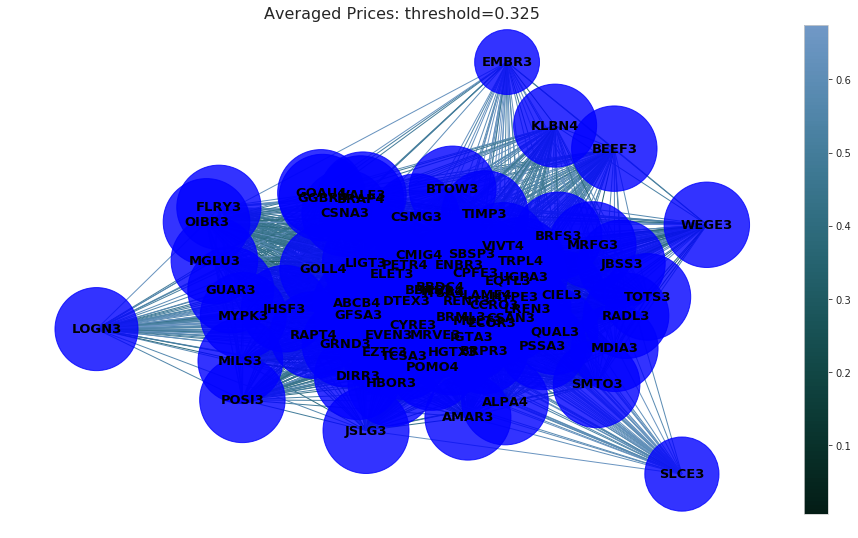

In [50]:
# plots the distance correlation network of the daily opening prices from 2006-2014
plt_corr_nx(H_master, title='Averaged Prices: threshold=0.325')

And now with a threshold of 0.45:

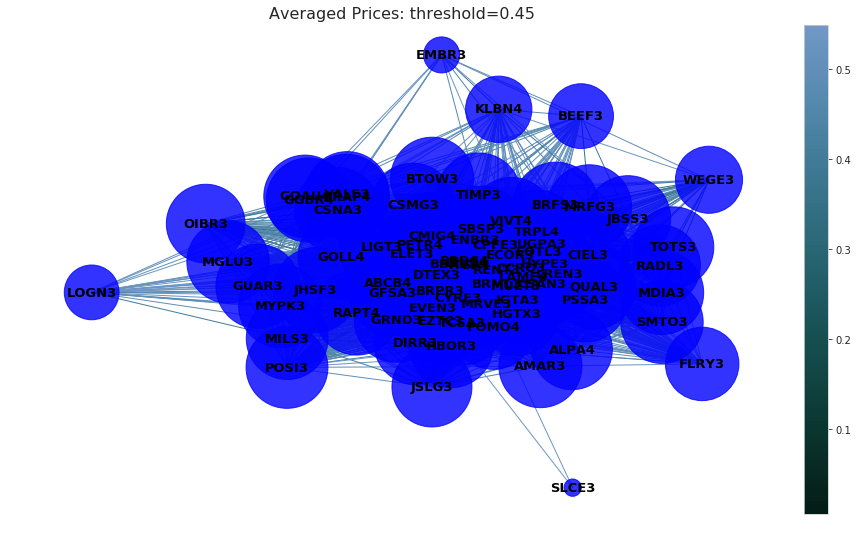

In [51]:
plt_corr_nx(build_corr_nx(df_dcor_master, corr_threshold=0.45), title='Averaged Prices: threshold=0.45')

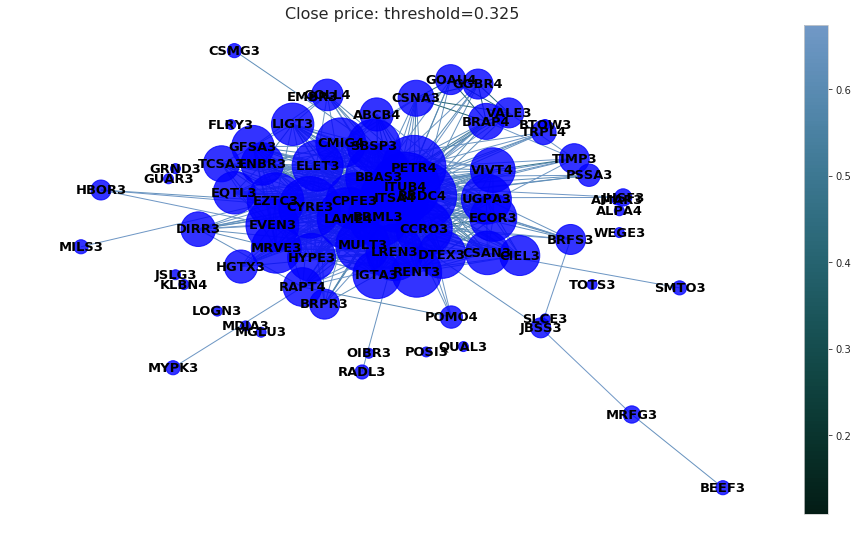

In [52]:
# plots the distance correlation network of the daily opening prices from 2006-2014
plt_corr_nx(H_close, title='Close price: threshold=0.325')

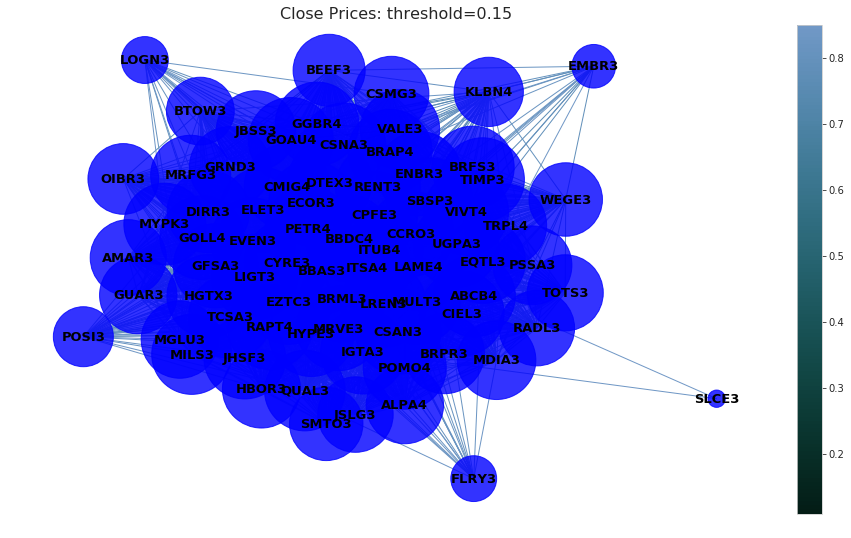

In [53]:
plt_corr_nx(build_corr_nx(df_dcor_list[0], corr_threshold=0.15), title='Close Prices: threshold=0.15')

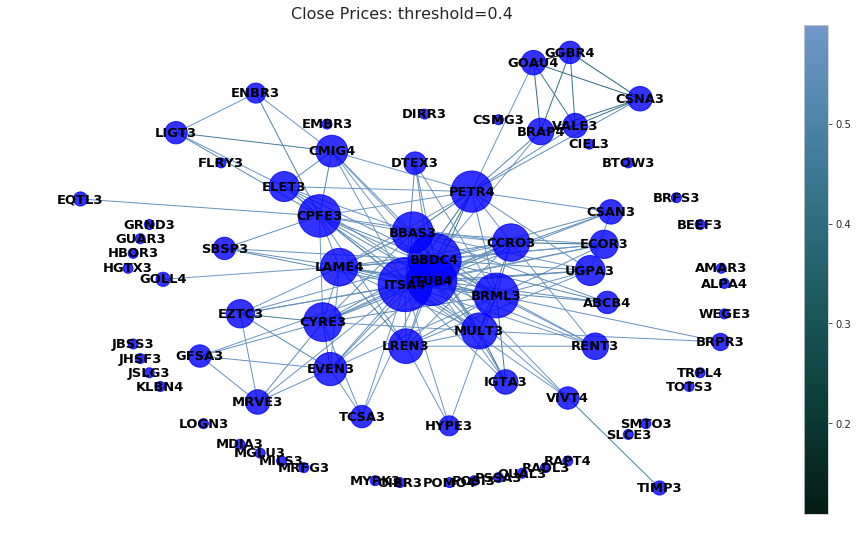

In [54]:
plt_corr_nx(build_corr_nx(df_dcor_list[0], corr_threshold=0.4), title='Close Prices: threshold=0.4')

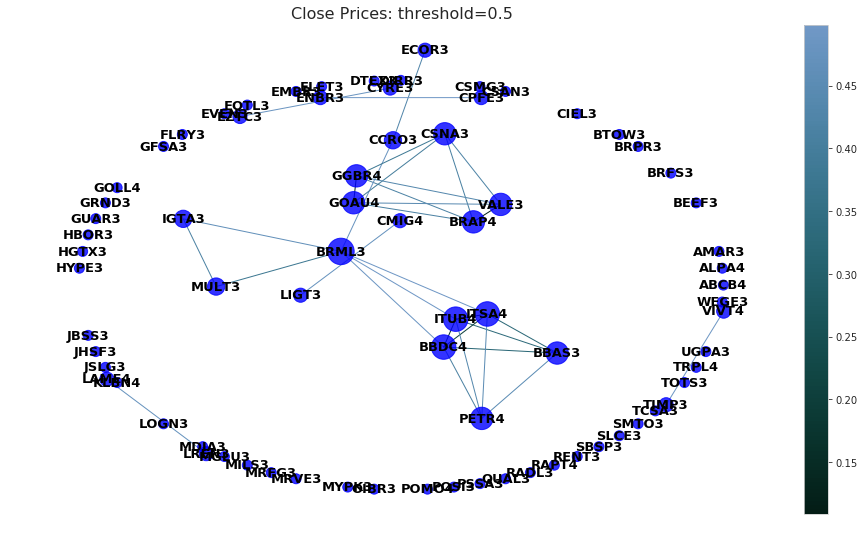

In [55]:
plt_corr_nx(build_corr_nx(df_dcor_list[0], corr_threshold=0.5), title='Close Prices: threshold=0.5')

In the above visualizations, the sizes of the vertices are proportional to the number of connections they have. The colorbar to the right indicates the degree of disimilarity (the distance) between the stocks. The larger the value (the lighter the color) the less similar the stocks are. 

We compared the graphs for the averaged prices and the close price with different threshold values. We will perform our portfolio selection model with the close price and discard the averaged prices data because it seems to add artificial connections to the graph. We will use only one of the series (as usual we choose the close prices).

Also, by trying different values for the threshold we were able to identify the value of 0.4 to be of interest, because:

1. It allow us clearly visualize the network;
2. We obtain a highly connected network, but will have to remove a few stocks to obtain airreducible graph. 

## Degree Histogram

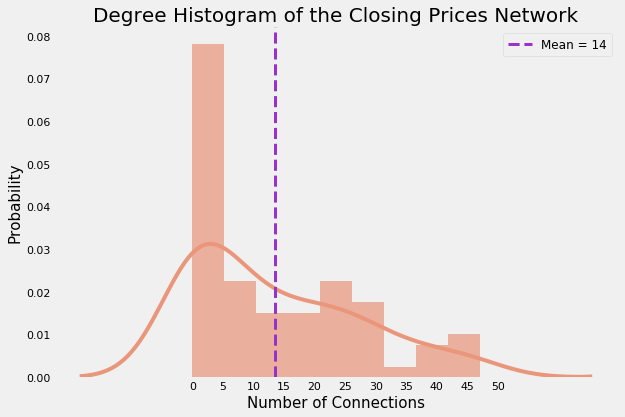

In [56]:
# plots the degree histogram of the closing prices network
hist_plot(
    H_close, 
    'Degree Histogram of the Closing Prices Network', 
    bins=9, 
    xticks=range(0, 51, 5)
)

**Observations**

* The degree distribution is right-skewed;
* Most of the network is connected to less than 15 nodes;
* The average node is connected to 21% of the network;
* The kernel density estimation is not a good fit;


**CHECK:**
* By eyeballing the plot, the degrees appear to follow an *inverse power-law* distribution. (This would be consistent with the findings of [Tse, *et al*. (2010)](http://cktse.eie.polyu.edu.hk/pdf-paper/JoEF-1009.pdf)).

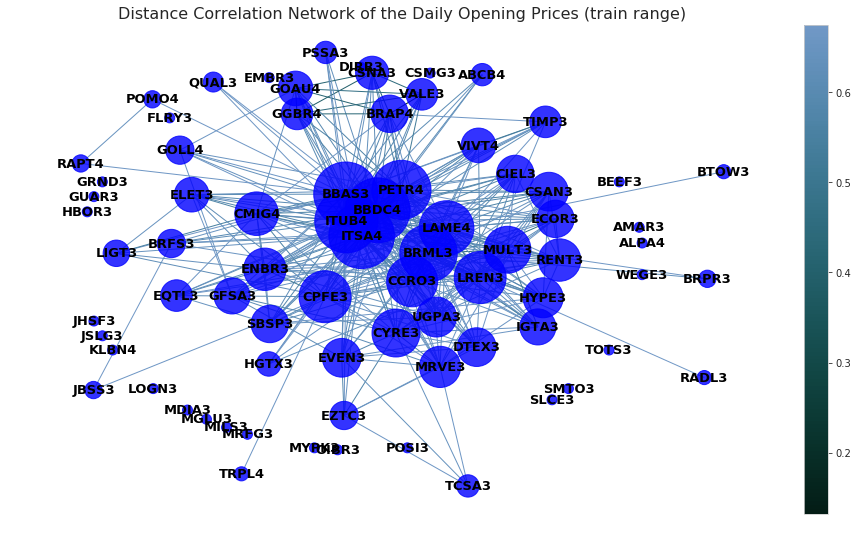

In [57]:
plt_corr_nx(
    H_open, 
    title='Distance Correlation Network of the Daily Opening Prices (train range)'
)

**Observations**

* ...

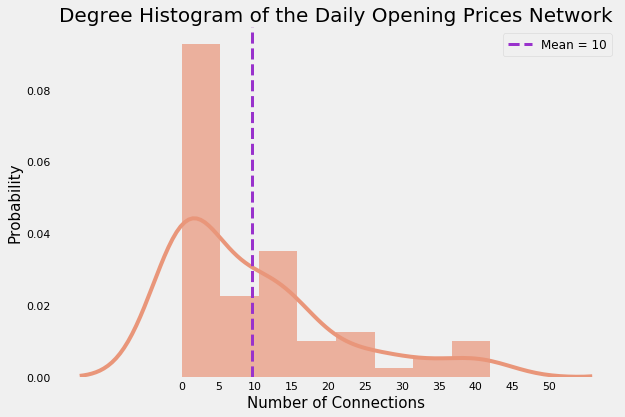

In [58]:
hist_plot(
    H_open, 
    'Degree Histogram of the Daily Opening Prices Network', 
    bins=8, 
    xticks=range(0, 51, 5)
)

## Find non-communicating nodes

In [59]:
H_close_04 = build_corr_nx(df_dcor_list[0], corr_threshold=0.4)
zero_degree = []
nonzero_degree = []
for t, d in H_close_04.degree():
    if d == 0:
        zero_degree.append(t)
    else:
        nonzero_degree.append(t)
        
print(zero_degree)
print(len(zero_degree))
print(nonzero_degree)
print(len(nonzero_degree))

['ALPA4', 'AMAR3', 'BEEF3', 'BRFS3', 'BTOW3', 'CIEL3', 'CSMG3', 'DIRR3', 'EMBR3', 'FLRY3', 'GRND3', 'GUAR3', 'HBOR3', 'HGTX3', 'JBSS3', 'JHSF3', 'JSLG3', 'KLBN4', 'LOGN3', 'MDIA3', 'MGLU3', 'MILS3', 'MRFG3', 'MYPK3', 'OIBR3', 'POMO4', 'POSI3', 'PSSA3', 'QUAL3', 'RADL3', 'RAPT4', 'SLCE3', 'SMTO3', 'TOTS3', 'TRPL4', 'WEGE3']
36
['ABCB4', 'BBAS3', 'BBDC4', 'BRAP4', 'BRML3', 'BRPR3', 'CCRO3', 'CMIG4', 'CPFE3', 'CSAN3', 'CSNA3', 'CYRE3', 'DTEX3', 'ECOR3', 'ELET3', 'ENBR3', 'EQTL3', 'EVEN3', 'EZTC3', 'GFSA3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3', 'IGTA3', 'ITSA4', 'ITUB4', 'LAME4', 'LIGT3', 'LREN3', 'MRVE3', 'MULT3', 'PETR4', 'RENT3', 'SBSP3', 'TCSA3', 'TIMP3', 'UGPA3', 'VALE3', 'VIVT4']
40


we found `36` nodes that are not comunicating with the graph, and `40` remaining.

We remove the non-comunicating nodes from the graph

In [60]:
H_close_04.remove_nodes_from(zero_degree)
nx.communicability_betweenness_centrality(H_close_04)

{'ABCB4': 0.08725605978306704,
 'BBAS3': 0.5309410219689249,
 'BBDC4': 0.7815946174244142,
 'BRAP4': 0.07818190712424275,
 'BRML3': 0.5941800636255721,
 'BRPR3': 0.012702861231061189,
 'CCRO3': 0.4506839220118794,
 'CMIG4': 0.23074699401962512,
 'CPFE3': 0.5457283238760674,
 'CSAN3': 0.10949770544524091,
 'CSNA3': 0.03210626020942658,
 'CYRE3': 0.42025513698581524,
 'DTEX3': 0.0902695583873841,
 'ECOR3': 0.20467048163390558,
 'ELET3': 0.21303373665936967,
 'ENBR3': 0.014535233499673072,
 'EQTL3': 0.0036335312208860236,
 'EVEN3': 0.23501363586418791,
 'EZTC3': 0.1597178236451738,
 'GFSA3': 0.03744594557288801,
 'GGBR4': 0.007298774751451984,
 'GOAU4': 0.032106260209426675,
 'GOLL4': 0.006616607374636342,
 'HYPE3': 0.036170789838668393,
 'IGTA3': 0.119863406174914,
 'ITSA4': 0.7822619534045313,
 'ITUB4': 0.7266462108739908,
 'LAME4': 0.45728564877226735,
 'LIGT3': 0.024936985198907892,
 'LREN3': 0.322626553467301,
 'MRVE3': 0.04999573376198801,
 'MULT3': 0.3841406626489796,
 'PETR4': 0.5

In [62]:
is_irreducible(H_close_04)

True

Now we plot the resulting graph

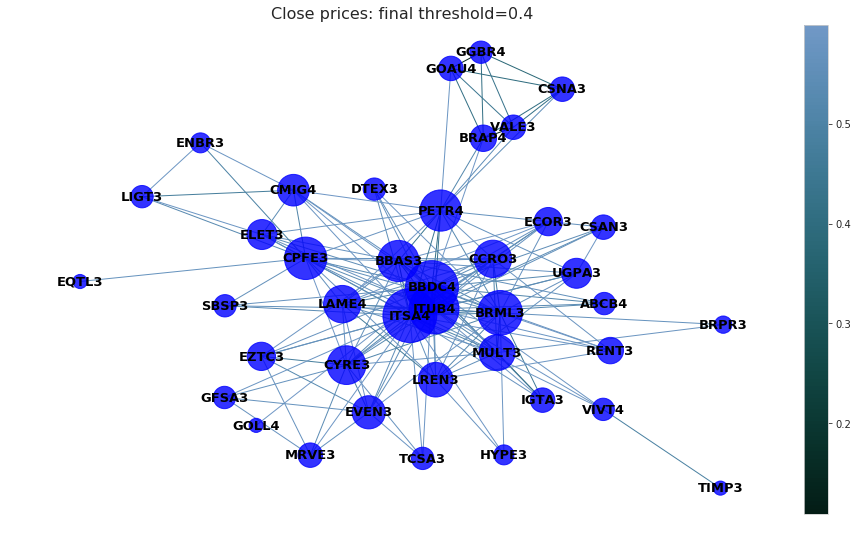

In [63]:
plt_corr_nx(
    H_close_04, 
    title='Close prices: final threshold=0.4'
)

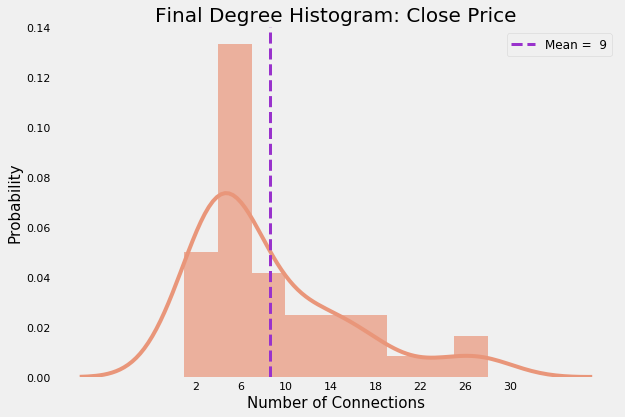

In [64]:
hist_plot(
    H_close_04, 
    'Final Degree Histogram: Close Price', 
    bins=9, 
    xticks=range(2, 31, 4)
)

## Saving the data

In [65]:
df_dcor_list[0].head()

,ABCB4,ALPA4,AMAR3,BBAS3,BBDC4,BEEF3,BRAP4,BRFS3,BRML3,BRPR3,...,SLCE3,SMTO3,TCSA3,TIMP3,TOTS3,TRPL4,UGPA3,VALE3,VIVT4,WEGE3
ABCB4,1,0.201515,0.161761,0.437852,0.478561,0.155024,0.263558,0.211942,0.335901,0.200024,...,0.122094,0.191095,0.299077,0.216791,0.197748,0.244506,0.331505,0.208125,0.286034,0.145269
ALPA4,0.201515,1,0.154641,0.234509,0.269451,0.0990885,0.161213,0.167425,0.268881,0.207615,...,0.13459,0.189858,0.213893,0.157223,0.16028,0.181527,0.219965,0.122671,0.209029,0.105579
AMAR3,0.161761,0.154641,1,0.24322,0.267108,0.137688,0.176539,0.154619,0.251318,0.192082,...,0.0827682,0.137125,0.230018,0.186794,0.143749,0.144438,0.206026,0.18206,0.192242,0.123828
BBAS3,0.437852,0.234509,0.24322,1,0.676998,0.178363,0.371789,0.34115,0.482024,0.292628,...,0.118487,0.217905,0.381072,0.308349,0.243023,0.330545,0.416078,0.321763,0.376622,0.231224
BBDC4,0.478561,0.269451,0.267108,0.676998,1,0.193091,0.40401,0.37949,0.511172,0.331999,...,0.116521,0.221541,0.405234,0.348897,0.255126,0.318519,0.465544,0.367717,0.408914,0.262674


In [66]:
# Save the non-zero degree list
with(open(r"data/selected_tickers.txt", "w")) as f:
    f.write(",".join(nonzero_degree))

# Save the close data frame
df_dcor_list[0].to_csv(r"data/close_prices_dcor.csv")

In [67]:
# Save the H_Close
import pickle
with(open(r"data/H_close.pkl", "wb")) as f:
    pickle.dump(H_close_04, f)